<a href="https://colab.research.google.com/github/ajaysaikiran2208/Recommendation-Systems/blob/main/TV_Shows_Analysis_and_restriction_depending_upon_age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries
import re
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [55]:
tv_show=pd.read_csv("/content/tv_shows.csv")

In [56]:
tv_show.sample()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
2402,2402,Being Erica,2009,16+,7.5,NaN,0,1,1,0,1


In [57]:
#looking at the data
tv_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5611 non-null   int64  
 1   Title            5611 non-null   object 
 2   Year             5611 non-null   int64  
 3   Age              3165 non-null   object 
 4   IMDb             4450 non-null   float64
 5   Rotten Tomatoes  1011 non-null   object 
 6   Netflix          5611 non-null   int64  
 7   Hulu             5611 non-null   int64  
 8   Prime Video      5611 non-null   int64  
 9   Disney+          5611 non-null   int64  
 10  type             5611 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 482.3+ KB


In [58]:
#Converting the percentages to number
tv_show['Rotten Tomatoes'] = tv_show['Rotten Tomatoes'].str.rstrip('%').astype('float')

In [59]:
#Removing the "+" sign from age rating
tv_show["Age"] = tv_show["Age"].str.replace("+","")


In [60]:
#Conveting it to numeric 
tv_show['Age'] = pd.to_numeric(tv_show['Age'],errors='coerce')

In [61]:
#Final data
tv_show.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18.0,9.5,96.0,1,0,0,0,1
1,1,Stranger Things,2016,16.0,8.8,93.0,1,0,0,0,1
2,2,Money Heist,2017,18.0,8.4,91.0,1,0,0,0,1
3,3,Sherlock,2010,16.0,9.1,78.0,1,0,0,0,1
4,4,Better Call Saul,2015,18.0,8.7,97.0,1,0,0,0,1


In [62]:
#only the data will complete column values available
#later use
df=tv_show.dropna()

In [63]:
df["Age"].value_counts()

18.0    376
16.0    359
7.0     177
13.0      3
Name: Age, dtype: int64

In [64]:
#Taking the values
titles=tv_show["Title"].values

In [65]:
text=' '.join(titles)

In [66]:
len(text)

100723

In [67]:
#How it looks
text[1000:1500]

"er Love, Death & Robots Marvel's Jessica Jones New Girl The Good Wife The Umbrella Academy Marvel's The Punisher Ash vs Evil Dead Master of None Bodyguard Schitt's Creek Narcos: Mexico The West Wing Bates Motel Atypical Once Upon a Time Gomorrah Making a Murderer Death Note Castlevania Riverdale Burn Notice Fauda Russian Doll Our Planet Big Mouth American Horror Story Gotham I Am Not Okay with This Criminal Minds The Vietnam War Waco Star Trek The OA Outer Banks The Midnight Gospel Good Girls Ch"

In [68]:
#Removing the punctuation
text = re.sub(r'[^\w\s]','',text)

In [69]:
text[1000:1500]

'ots Marvels Jessica Jones New Girl The Good Wife The Umbrella Academy Marvels The Punisher Ash vs Evil Dead Master of None Bodyguard Schitts Creek Narcos Mexico The West Wing Bates Motel Atypical Once Upon a Time Gomorrah Making a Murderer Death Note Castlevania Riverdale Burn Notice Fauda Russian Doll Our Planet Big Mouth American Horror Story Gotham I Am Not Okay with This Criminal Minds The Vietnam War Waco Star Trek The OA Outer Banks The Midnight Gospel Good Girls Chilling Adventures of Sab'

In [88]:
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+|\$[\d\.]+|\S+')
#Tokenizing the text
tokens = tokenizer.tokenize(text)
#now we shall make everything lowercase for uniformity
#to hold the new lower case words
words = []
# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())
#Stop words are generally the most common words in a language.
#English stop words from nltk.
stopwords = nltk.corpus.stopwords.words('english')
words_new = []
#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw
for word in words:
    if word not in stopwords:
        words_new.append(word)


In [90]:
word

'animals'

In [80]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [91]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(words_new)

In [92]:
freq_dist

FreqDist({'breaking': 4,
          'bad': 8,
          'stranger': 4,
          'things': 13,
          'money': 11,
          'heist': 1,
          'sherlock': 2,
          'better': 4,
          'call': 7,
          'saul': 1,
          'office': 5,
          'black': 31,
          'mirror': 1,
          'supernatural': 2,
          'peaky': 1,
          'blinders': 1,
          'avatar': 1,
          'last': 29,
          'airbender': 1,
          'walking': 4,
          'dead': 18,
          'dark': 17,
          'ozark': 1,
          'attack': 4,
          'titan': 3,
          'narcos': 3,
          'fullmetal': 2,
          'alchemist': 2,
          'brotherhood': 2,
          'community': 1,
          'mindhunter': 1,
          'parks': 3,
          'recreation': 1,
          'dexter': 1,
          'marvels': 19,
          'daredevil': 1,
          'witcher': 1,
          'twin': 1,
          'peaks': 1,
          'onepunch': 1,
          'man': 34,
          'outlander': 1,
  

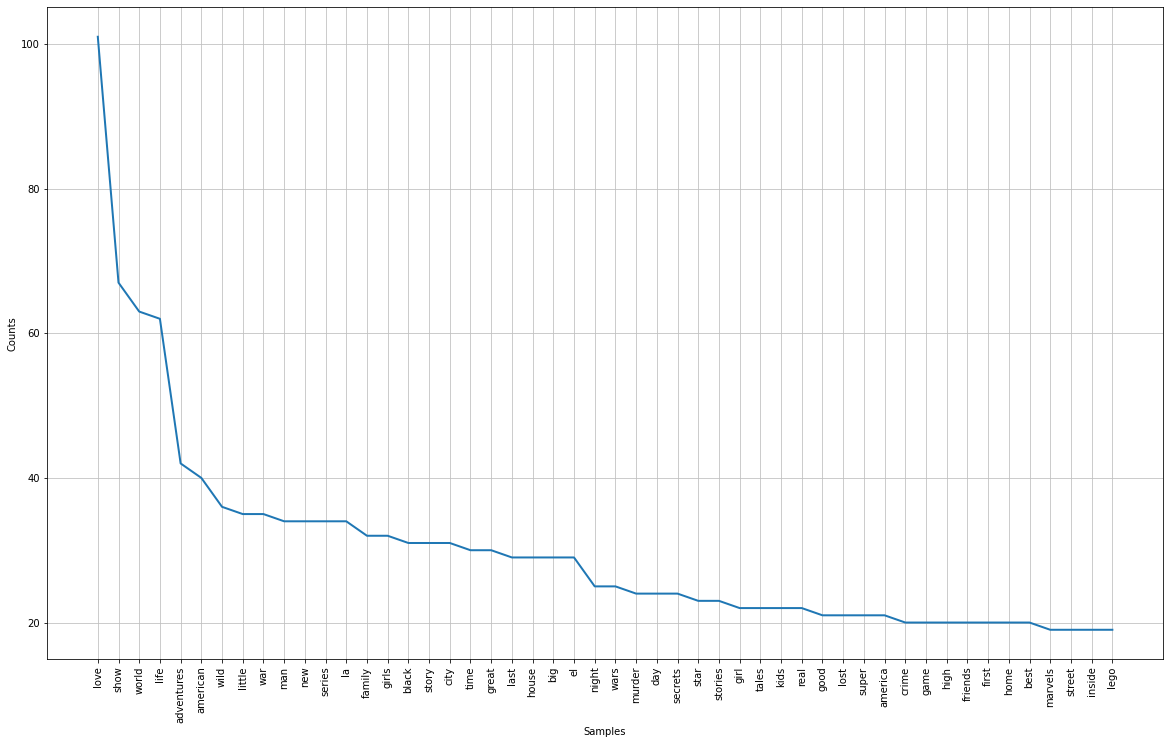

In [94]:
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist.plot(50)

In [95]:
#converting into string
res=' '.join([i for i in words_new if not i.isdigit()])

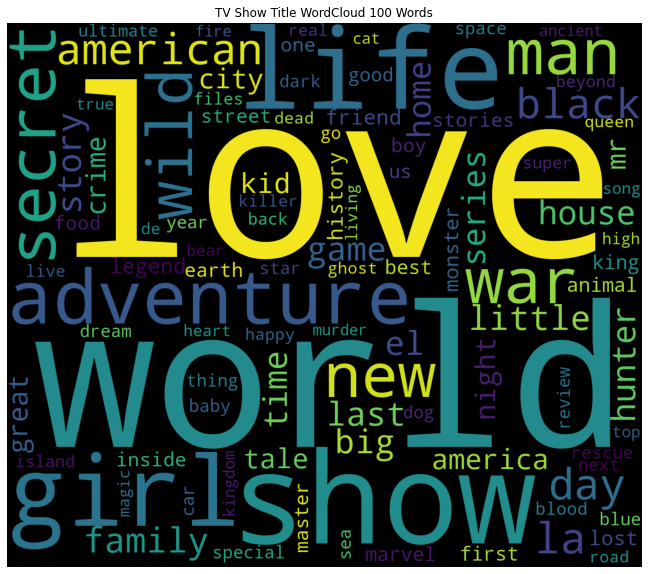

In [96]:
#wordcloud
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('TV Show Title WordCloud 100 Words')
plt.axis('off')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


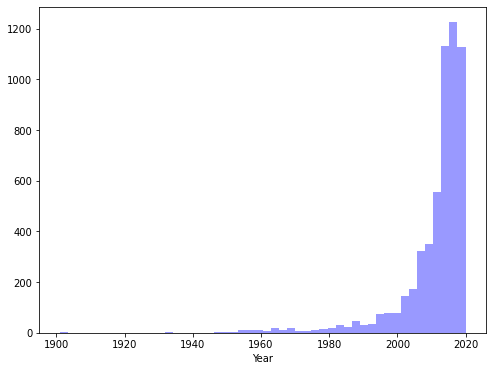

In [98]:
#overall year of release analysis
plt.subplots(figsize=(8,6))
sns.distplot(tv_show["Year"],kde=False, color="blue")

In [99]:
print("TV Shows with highest IMDb ratings are= ")
print((tv_show.sort_values("IMDb",ascending=False).head(20))['Title'])

TV Shows with highest IMDb ratings are= 
3023                             Destiny
0                           Breaking Bad
3747                        Malgudi Days
3177                        Hungry Henry
3567                    Band of Brothers
2365                 The Joy of Painting
4128                      Green Paradise
91                            Our Planet
3566                            The Wire
325                              Ramayan
1931                      Rick and Morty
4041                     Everyday Driver
3701                            Baseball
282                      Yeh Meri Family
3798                             The Bay
4257                  Single and Anxious
3568                        The Sopranos
4029             Harmony with A R Rahman
9             Avatar: The Last Airbender
15      Fullmetal Alchemist: Brotherhood
Name: Title, dtype: object


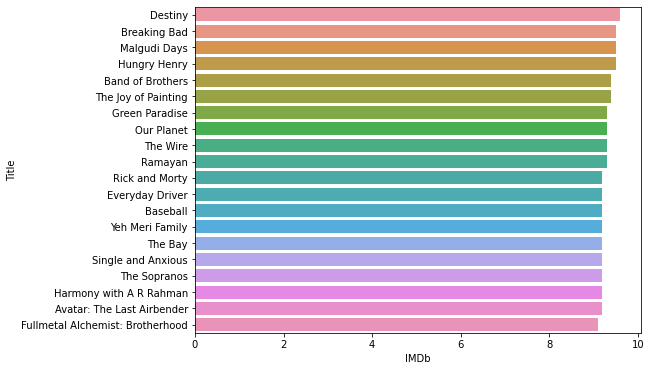

In [100]:
#barplot of rating
plt.subplots(figsize=(8,6))
sns.barplot(x="IMDb", y="Title" , data= tv_show.sort_values("IMDb",ascending=False).head(20))

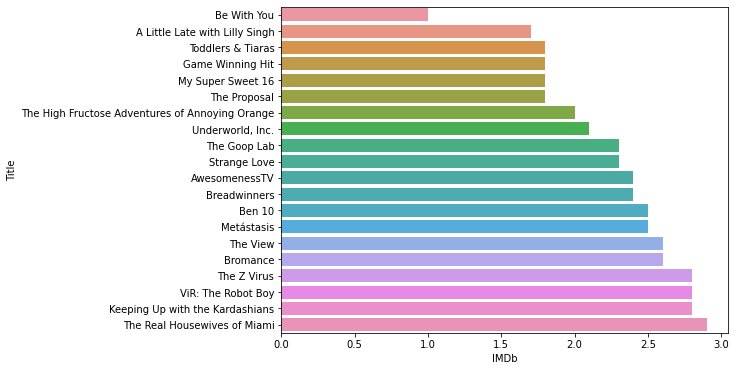

In [101]:
#barplot of rating
plt.subplots(figsize=(8,6))
sns.barplot(x="IMDb", y="Title" , data= tv_show.sort_values("IMDb",ascending=True).head(20))

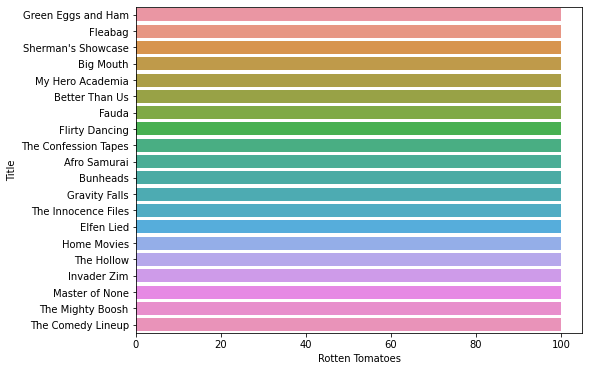

In [102]:
#barplot of rating
plt.subplots(figsize=(8,6))
sns.barplot(x="Rotten Tomatoes", y="Title" , data= tv_show.sort_values("Rotten Tomatoes",ascending=False).head(20))

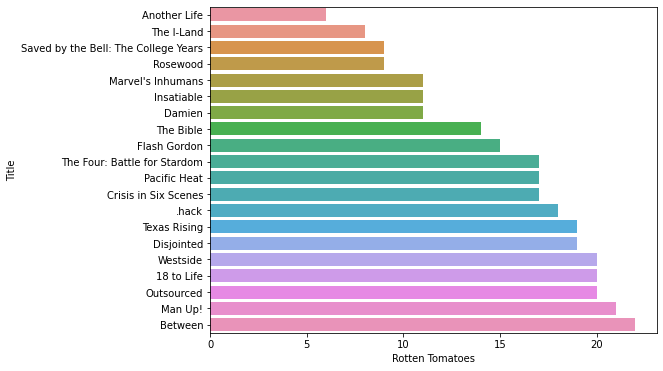

In [103]:
#barplot of rating
plt.subplots(figsize=(8,6))
sns.barplot(x="Rotten Tomatoes", y="Title" , data= tv_show.sort_values("Rotten Tomatoes",ascending=True).head(20))

In [106]:
#Taking the relevant data
ratings=tv_show[["Title",'Age','IMDb',"Rotten Tomatoes"]]
ratings.head()

,Title,Age,IMDb,Rotten Tomatoes
0,Breaking Bad,18.0,9.5,96.0
1,Stranger Things,16.0,8.8,93.0
2,Money Heist,18.0,8.4,91.0
3,Sherlock,16.0,9.1,78.0
4,Better Call Saul,18.0,8.7,97.0


In [121]:
Age_of_the_user=int(input("Enter the age:"))
if Age_of_the_user<10:
  parents_supervision=input("Are you under parents supervision:")
else:
  print("Enter to the Entertainment world:")
  


Enter the age:10
Enter to the Entertainment world:


In [130]:
if parents_supervision=="Yes":
  password=input("Enter the password:")
else:
  print("Need parents supervision")
if password=="1234":
  login=print("login successful")
else:
    print("Sorry!!!Go Back and Study")
age_df = ratings[ratings['Age']<10]
print("The recommendation for the Child:",age_df) 

Enter the password:1234
login successful
The recommendation for the Child:                                                Title  ...  Rotten Tomatoes
9                         Avatar: The Last Airbender  ...            100.0
16                                         Community  ...             88.0
30                                         The Flash  ...             89.0
38                               The Vampire Diaries  ...             85.0
59                                 The Twilight Zone  ...             82.0
...                                              ...  ...              ...
5575                           Marvel's Hero Project  ...             92.0
5584                 The Avengers: United They Stand  ...              NaN
5588                                   Kirby Buckets  ...              NaN
5589                       LEGO Star Wars: All-Stars  ...              NaN
5598  Billy Dilley's Super-Duper Subterranean Summer  ...              NaN

[848 rows x 4 columns]


,Title,Age,IMDb,Rotten Tomatoes
9,Avatar: The Last Airbender,7.0,9.2,100.0
16,Community,7.0,8.5,88.0
30,The Flash,7.0,7.7,89.0
38,The Vampire Diaries,7.0,7.7,85.0
59,The Twilight Zone,7.0,9.0,82.0
...,...,...,...,...
5575,Marvel's Hero Project,7.0,6.1,92.0
5584,The Avengers: United They Stand,7.0,5.5,NaN
5588,Kirby Buckets,7.0,4.6,NaN
5589,LEGO Star Wars: All-Stars,7.0,6.6,NaN
